## Observations and Insights 

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_micedf =pd.merge (mouse_metadata, study_results, how = 'outer', on = 'Mouse ID')

# Display the data table for preview
combine_micedf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combine_micedf["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Mice_Duplicated = combine_micedf[combine_micedf.duplicated(['Mouse ID','Timepoint'])]
Mice_Duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Mice_Duplicated_ALL = combine_micedf[combine_micedf.duplicated(['Mouse ID'])]
Mice_Duplicated_ALL

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_Mice = combine_micedf.drop_duplicates('Mouse ID')
Clean_Mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
Clean_Mice['Mouse ID'].count()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Tumor_Mean = combine_micedf.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Tumor_Median = combine_micedf.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
Tumor_Variance = combine_micedf.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Tumor_StandardD = combine_micedf.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
Tumor_sem = combine_micedf.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
Mice_Summary = pd.DataFrame({
    "Mean": Tumor_Mean,
    "Median": Tumor_Median,
    "Variance": Tumor_Variance,
    "Standard Deviation": Tumor_StandardD,
    "SEM": Tumor_sem

})
Mice_Summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg_df = combine_micedf.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg({"mean", "median", "var", "std", "sem"})
summary_stats_agg_df

,sem,var,std,mean,median
Drug Regimen,,,,,
Capomulin,0.329346,24.947764,4.994774,40.675741,41.557809
Ceftamin,0.469821,39.290177,6.268188,52.591172,51.776157
Infubinol,0.492236,43.128684,6.567243,52.884795,51.820584
Ketapril,0.603860,68.553577,8.279709,55.235638,53.698743
Naftisol,0.596466,66.173479,8.134708,54.331565,52.509285
Placebo,0.581331,61.168083,7.821003,54.033581,52.288934
Propriva,0.512884,42.351070,6.507770,52.322552,50.854632
Ramicane,0.320955,23.486704,4.846308,40.216745,40.673236
Stelasyn,0.573111,59.450562,7.710419,54.233149,52.431737


## Bar and Pie Charts

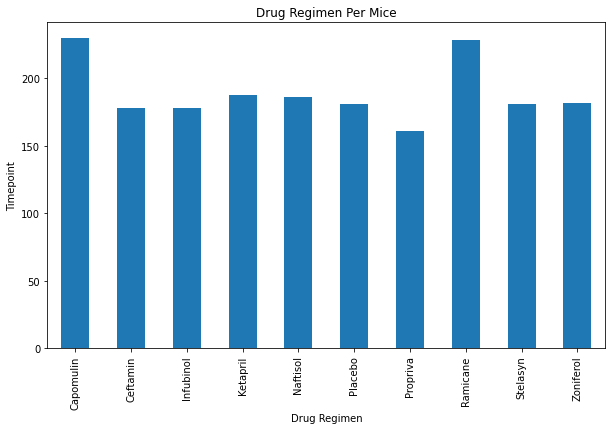

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Groupby_Drug = combine_micedf.groupby(["Drug Regimen"]).count()["Timepoint"]
Groupby_Drug.plot(kind ="bar",figsize = (10, 6))
plt.title("Drug Regimen Per Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.show()
plt.tight_layout()

In [10]:
Groupby_Drug

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

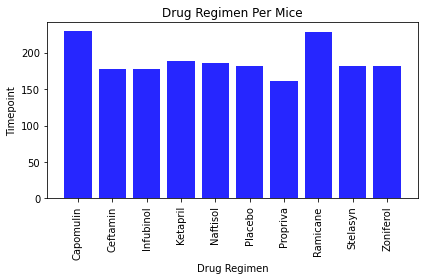

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn',
         'Zoniferol']
x_axis = np.arange(len(Groupby_Drug))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, users, color='b', alpha=.85, align="center")
plt.xticks(tick_locations,['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn',
         'Zoniferol'], rotation="vertical")
plt.title("Drug Regimen Per Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.show
plt.tight_layout()

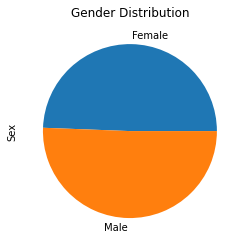

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Groupby_Gender = combine_micedf.groupby(["Sex"]).count()['Mouse ID']
Gender_pie = Groupby_Gender.plot(kind="pie", y='Sex', title="Gender Distribution")
Gender_pie.set_ylabel("Sex")
plt.show()


In [13]:
Groupby_Gender

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

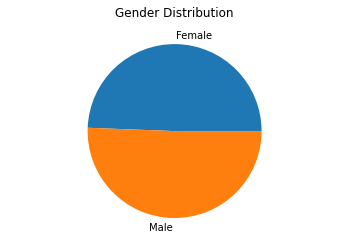

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Groupby_Gender = combine_micedf.groupby(["Sex"]).count()['Mouse ID']
Sex = ["Female", "Male"]
Gender_Count = [935, 958]
plt.title("Gender Distribution")
plt.axis("equal")
plt.pie(Gender_Count, labels=Sex,)
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
combine_micedf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Regimen_Breakdown = combine_micedf.sort_values(['Drug Regimen','Mouse ID','Timepoint','Tumor Volume (mm3)'])
GreatestTP = Regimen_Breakdown.loc[Regimen_Breakdown["Timepoint"] == 45]


In [17]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

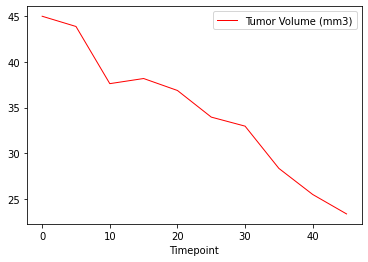

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomlin_Selection = combine_micedf.loc[combine_micedf["Drug Regimen"] == "Capomulin"]
Capomlin_Selection = Capomlin_Selection.reset_index()
Capomlin_Mouse_2 = Capomlin_Selection.loc[Capomlin_Selection["Mouse ID"] == "s185"]
Capomlin_Mouse = Capomlin_Mouse_2.loc[:,["Timepoint","Tumor Volume (mm3)"]]
Capomlin_Mouse = Capomlin_Mouse.reset_index(drop=True)
Capomlin_Mouse.set_index("Timepoint").plot(color="red", linewidth=1)

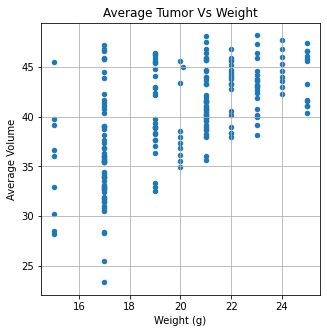

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomlin_Selection = combine_micedf.loc[combine_micedf["Drug Regimen"] == "Capomulin"]
Capomlin_Weight = Capomlin_Selection.loc[:,["Mouse ID", "Weight (g)","Tumor Volume (mm3)"]]
AVG_CAP = Capomlin_Weight.groupby("Tumor Volume (mm3)").mean().reset_index()
AVG_CAP = AVG_CAP.rename(columns={"Tumor Volume (mm3)":"Average Volume"})
AVG_CAP.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(5,5),
              title="Average Tumor Vs Weight")
plt.show()


In [22]:
AVG_CAP

,Average Volume,Weight (g)
0,23.343598,17.0
1,25.472143,17.0
2,28.167397,15.0
3,28.328531,17.0
4,28.430964,17.0
...,...,...
201,47.373423,25.0
202,47.488599,21.0
203,47.685963,24.0
204,48.070452,21.0


## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weightmice = AVG_CAP.iloc[:,0]
tumoravg = AVG_CAP.iloc[:,1]
correlation = st.pearsonr(weightmice, tumoravg)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.58


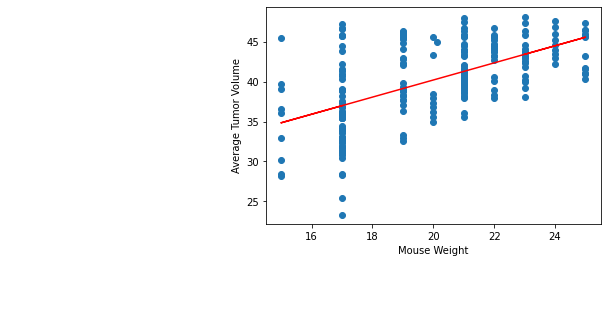

In [28]:
x_values = AVG_CAP['Weight (g)']
y_values = AVG_CAP['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()